# 案例：基于NLP和情感分析的交易策略

<div class="alert alert-block alert-success">
随着非结构化数据量的增加，基于文本数据的交易策略变得越来越受欢迎。在这个案例研究中，我们将探讨如何使用基于 NLP 的情感来构建交易策略。
</div>

<a id="GD"></a>
```{admonition} 小组讨论：财报会影响股票价格么？ 
:class: note
阅读该新闻：<a href="https://www.apple.com.cn/newsroom/2022/07/apple-reports-third-quarter-results/#:~:text=%E5%8A%A0%E5%88%A9%E7%A6%8F%E5%B0%BC%E4%BA%9A%E5%B7%9E%EF%BC%8C%E5%BA%93%E6%AF%94%E6%8F%90%E8%AF%BA%202022%20%E5%B9%B4%207%20%E6%9C%88%2028%20%E6%97%A5%20Apple,2022%20%E8%B4%A2%E5%B9%B4%E7%AC%AC%E4%B8%89%E5%AD%A3%E5%BA%A6%E8%B4%A2%E5%8A%A1%E4%B8%9A%E7%BB%A9%E3%80%82%20%E5%85%AC%E5%8F%B8%E5%85%AC%E5%B8%83%E5%85%AD%E6%9C%88%E4%BB%BD%E5%AD%A3%E5%BA%A6%E8%90%A5%E6%94%B6%E8%BE%BE%E5%88%B0%E5%88%9B%E7%BA%AA%E5%BD%95%E7%9A%84%20830%20%E4%BA%BF%E7%BE%8E%E5%85%83%EF%BC%8C%E5%90%8C%E6%AF%94%E5%A2%9E%E9%95%BF%202%25%EF%BC%8C%E6%9C%AC%E5%AD%A3%E5%BA%A6%E7%A8%80%E9%87%8A%E5%90%8E%E6%AF%8F%E8%82%A1%E6%94%B6%E7%9B%8A%E4%B8%BA%201.20%20%E7%BE%8E%E5%85%83%E3%80%82" target="_blank"> 2022年7月 28日 Apple公布第三季度业绩 </a>，分小组讨论以下问题：
<br>1. 苹果公司发布季度财报会影响的其股票（代码：AAPL）价格么
<br>2. 除了财报发布，还有哪些新闻会影响股票价格？
<br>3. 哪些新闻会带来负面的投资者情绪？
<br>3. 情感分析可以应用于上述金融场景中么？
<br>分小组讨论后，在链接中回答以上问题：<a href="https://docs.qq.com/form/page/DWm1XWkxMdHBveUtC" target="_blank"> 
https://docs.qq.com/form/page/DWm1XWkxMdHBveUtC </a> 
```

## 1. 问题描述

自然语言处理（NLP）提供了量化文本的能力。人们可以开始提出这样的问题：
1. 这条新闻有多积极或多消极？
2. 我们如何量化词语？
3. NLP能否来监控市场情绪？

通过将基于 NLP 的情感分析技术应用于新闻文章、报告、社交媒体或其他网络内容，可以有效地确定这些来源是否具有正面或负面的情感评分。进一步，投资者和金融机构发现情感评分可以作为方向性交易信号，例如，买入具有正面评分的股票和卖出具有负面评分的股票，在市场上获利。

本文将探讨如何利用基于NLP的情感来构建交易策略，流程如下：

1. **情感数据收集**：首先，需要收集包含市场参与者情感的数据，这些数据可以来自于各种来源，例如金融新闻、社交媒体（如Twitter、StockTwits）、公司报告、分析师评论等。这些文本数据通常包含对于特定资产或市场的观点、情绪和预测。

2. **情感分析**：利用NLP技术对收集到的文本数据进行情感分析。情感分析可以帮助识别文本中的情感倾向，通常分为正面、负面和中性情绪。在金融领域，特别是在交易策略构建中，关注的主要是与市场走势相关的情感。

3. **交易策略制定**：根据情感指标与市场走势之间的关联关系，制定相应的交易策略。例如，可以基于情感指标的变化来进行买入或卖出决策，或者将情感指标作为其他技术分析指标的辅助。

4. **回测与优化**：在历史数据上进行回测，评估和优化构建的交易策略。通过回测可以评估策略的盈亏情况，从而进行必要的调整和优化。



## 2. 加载数据

这里我们收集苹果股票（代码：AAPL）的股票价格，以及雅虎财经给出的相关财经文本，并将其按照对应日期合并到一个表格中。

使用pandas读取该表格，

In [1]:
import pandas as pd
data_df = pd.read_csv('datasets/AAPL_NewsAndReturnData.csv')
data_df.head()

,ticker,headline,date,eventRet,Close
0,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.032870,10.025860
1,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.002913,10.037944
2,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,0.001156,9.521007
3,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.029160,10.785560
4,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.010667,10.810323


## 3. 情感分析
使用TextBlob库对预处理后的文本进行情感分析，计算出来的情感极性是一个介于-1（非常负面）和+1（非常正面）之间的数值。

In [2]:
from textblob import TextBlob
sentiment = []
for s in data_df['headline'].astype(str):
    sentiment_ = TextBlob(s).sentiment.polarity
    sentiment.append(sentiment_)
data_df['sentiment_textblob'] = sentiment

NLTK库信息： {'nltk_data path': 'nltk/nltk_data', 'nltk_data included': ['tokenizers/punkt', 'taggers/averaged_perceptron_tagger', 'taggers/universal_tagset', 'corpora/.DS_Store', 'corpora/inaugural', 'corpora/wordnet.zip', 'corpora/stopwords.zip']}


让我们分析情感分数与回报率的散点图。

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

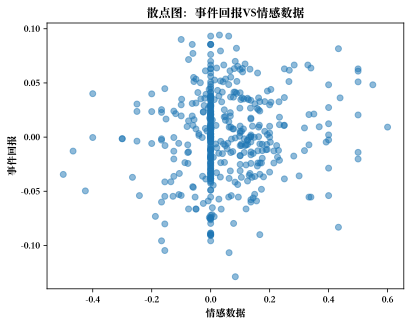

In [4]:
plt.scatter(data_df['sentiment_textblob'],data_df['eventRet'], alpha=0.5)
plt.title('散点图：事件回报VS情感数据')
plt.ylabel('事件回报')
plt.xlabel('情感数据')
plt.show()

总体来看，从结果中我们可以看到新闻收益和情感之间没有很强的相关性。此外，很多情感分数集中在0附近。

## 4. 特征工程
将情感得分和其他相关特征（如股票价格、交易量等）组合成特征向量，以便输入到交易模型中。

In [5]:
data_df

,ticker,headline,date,eventRet,Close,sentiment_textblob
0,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.032870,10.025860,0.020000
1,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.002913,10.037944,0.000000
2,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,0.001156,9.521007,-0.000794
3,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.029160,10.785560,-0.022222
4,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.010667,10.810323,0.248611
...,...,...,...,...,...,...
460,AAPL,Piper Jaffray cuts its Apple (NASDAQ:AAPL) pri...,2018-12-13,-0.018270,40.912155,0.000000
461,AAPL,A U.S. tribunal will review a ruling that said...,2018-12-13,-0.018270,40.912155,0.000000
462,AAPL,D.A. Davidson maintains a Buy rating on Apple ...,2018-12-14,-0.030364,39.603062,0.000000
463,AAPL,Noted Apple (NASDAQ:AAPL) analyst Ming-Chi Kuo...,2018-12-14,-0.030364,39.603062,0.000000


## 5. 构建交易策略
根据情感得分生成交易信号。这里设计一个简单的交易策略：
1. 当情感得分高于某个阈值时，生成买入信号；
2. 当情感得分低于某个阈值时，生成卖出信号。


In [6]:
def generate_trading_signals(data):
    buy_signals = data['sentiment_textblob'] > 0.2
    sell_signals = data['sentiment_textblob'] < -0.2
    data['signal'] = 0
    data.loc[buy_signals, 'signal'] = 1
    data.loc[sell_signals, 'signal'] = -1
    return data

signals = generate_trading_signals(data_df)
signals.index = pd.to_datetime(signals['date'])
signals['Close'] = signals['Close'].astype(float)
signals.head()

,ticker,headline,date,eventRet,Close,sentiment_textblob,signal
date,,,,,,,
2011-06-07,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.032870,10.025860,0.020000,0
2011-06-14,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.002913,10.037944,0.000000,0
2011-06-20,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,0.001156,9.521007,-0.000794,0
2011-07-07,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.029160,10.785560,-0.022222,0
2011-07-13,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.010667,10.810323,0.248611,1


## 6. 回测策略
使用历史数据对交易策略进行回测，以评估其性能。首先计算根据交易信号，生成的事件收益率，再计算累积收益率。

In [7]:
ret = (signals['eventRet'] * signals['signal'])
cum_ret = ret.cumsum()

Text(0.5, 1.0, '交易信号')

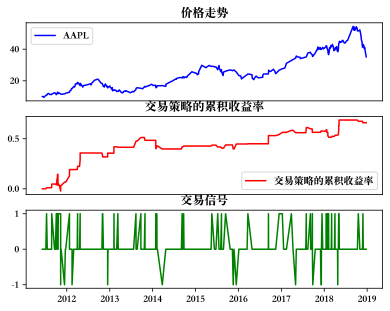

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=1)
# 子图1
ax[0].plot(signals['Close'], color='blue', label='AAPL')
ax[0].set_xticks([])
ax[0].set_title('价格走势')
ax[0].legend()
# 子图2
ax[1].plot(cum_ret, color='red', label='交易策略的累积收益率')
ax[1].set_xticks([])
ax[1].set_title('交易策略的累积收益率')
ax[1].legend()
# 子图3
ax[2].plot(signals['signal'], color='green', label='交易信号')
ax[2].set_title('交易信号')
#ax[2].legend()

观察上图，策略交易的累积收益率持续向上，交易信号次数较多，证明整体的策略思路是正确的。

## 总结
上述步骤提供了一个实现基于NLP和情感分析的交易策略的全面指南。需要注意的是，情感分析可能存在误差和不确定性，而且市场行为受多种因素影响，因此在实际应用中需要谨慎评估和管理风险。

## 学生可做研究


基于自然语言处理（NLP）和情感分析的交易策略可以有多种不同的设计，除了简单的买入/卖出信号生成外，还可以通过多种方式改进和优化。以下是一些其他策略和方法：

1. 多级情感信号
- **分级买入/卖出信号**：将情感得分划分为多个级别，例如非常积极、积极、中性、消极、非常消极。对于每个级别，设定不同的买入或卖出信号的强度。例如：
  - 情感得分非常积极时，强烈买入。
  - 情感得分积极时，适量买入。
  - 情感得分中性时，保持现有仓位。
  - 情感得分消极时，适量卖出。
  - 情感得分非常消极时，强烈卖出。

2. 情感趋势跟踪
- **情感变化趋势**：关注情感得分的变化趋势而不仅是绝对值。例如，当情感得分持续上升时生成买入信号，当情感得分持续下降时生成卖出信号。
- **情感均线策略**：类似于股票技术分析中的均线策略，计算情感得分的移动平均线。当短期均线突破长期均线时生成买入信号，反之生成卖出信号。

3. 结合其他数据源
- **多因子模型**：将情感得分与其他因子结合，例如技术指标（移动平均线、相对强弱指数等）、基本面数据（财报、经济指标等）以及市场情绪数据（新闻量、社交媒体讨论量等），构建多因子模型来生成交易信号。
- **情感与市场数据的交叉验证**：验证情感得分与市场数据（如价格、成交量等）之间的相关性，并根据这种关系调整交易策略。

4. 事件驱动策略
- **特定事件情感分析**：针对特定的市场事件（如财报发布、重大新闻、政策变化等）进行情感分析，根据事件前后情感得分的变化生成交易信号。
- **新闻与社交媒体整合**：综合分析新闻媒体和社交媒体的情感得分，当两者的一致性较高时，生成更强的交易信号。

5. 机器学习与深度学习模型
- **监督学习模型**：使用历史数据训练监督学习模型（如决策树、随机森林、支持向量机等），输入情感得分及其他相关数据，输出买入/卖出信号。
- **深度学习模型**：使用深度学习模型（如LSTM、GRU、Transformer等）处理时间序列情感数据，捕捉复杂的情感变化模式来生成交易信号。
- **情感和价格预测模型**：训练模型同时预测未来的情感得分和价格变化，根据预测结果制定交易策略。

6. 情感与波动率策略
- **波动率调节**：根据情感得分的波动性调整仓位大小。例如，当情感波动较大时，减少仓位以控制风险；当情感稳定时，增加仓位以提高收益。